In [1]:
# -- Uncomment following line if running in Google Colab
#! pip install gwpy

In [2]:
#! pip install matplotlib==3.1.3

In [3]:
import gwpy
print(gwpy.__version__)

2.0.2


In [4]:
from gwosc.datasets import event_gps
gps = event_gps('GW150914')
print(gps)

1126259462.4


In [5]:
segment = (int(gps)-5, int(gps)+5)
print(segment)

(1126259457, 1126259467)


In [6]:
from gwpy.timeseries import TimeSeries

hdata = TimeSeries.fetch_open_data('H1', 1126257414, 1126261510 , verbose=True)
print(hdata)

Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]
TimeSeries([-1.31984803e-19, -1.03396016e-19, -1.19238154e-19,
            ..., -2.12816741e-19, -1.92364362e-19,
            -1.95804961e-19]
           unit: dimensionless,
           t0: 1126257414.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [7]:
ldata = TimeSeries.fetch_open_data('L1', 1126257414, 1126261510 , verbose=True)
print(ldata)

Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]
TimeSeries([-1.27506324e-18, -1.27242468e-18, -1.30394696e-18,
            ..., -1.21257460e-18, -1.28441551e-18,
            -1.36645153e-18]
           unit: dimensionless,
           t0: 1126257414.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


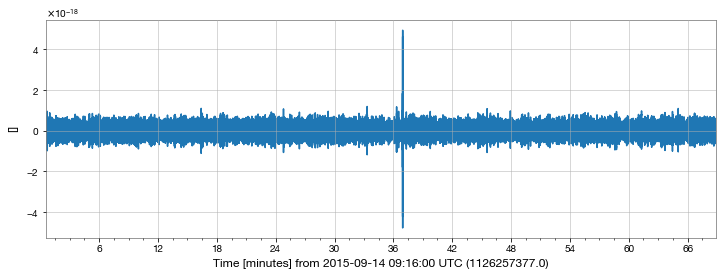

In [8]:
%matplotlib inline
plot = hdata.plot()
plot.show()

/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


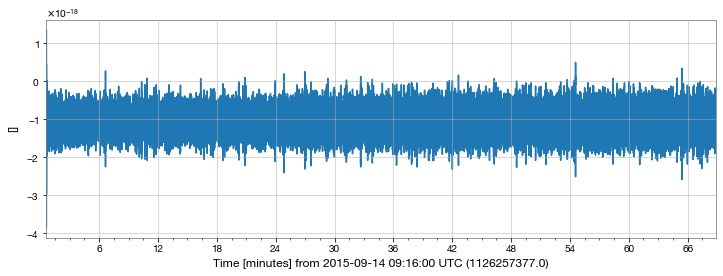

In [9]:
plot = ldata.plot()
plot.show()

In [10]:
fft_h = hdata.fft()
print(fft_h)

FrequencySeries([-1.19852028e-23+0.00000000e+00j,
                 -2.35145342e-23+3.18848562e-27j,
                 -2.33316573e-23+1.30784753e-25j, ...,
                  2.58929968e-27+5.58147582e-27j,
                 -8.41831379e-28-4.60762084e-28j,
                 -6.11614182e-27+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.000244140625 Hz,
                epoch: 1126257414.0,
                name: Strain,
                channel: None)


In [11]:
fft_l = ldata.fft()
print(fft_l)

FrequencySeries([-1.05679545e-18+0.00000000e+00j,
                 -1.90228656e-21-2.19445772e-21j,
                 -1.99571605e-22-1.43823203e-21j, ...,
                  6.47004341e-27+1.99368409e-27j,
                  3.44574342e-27-2.01531747e-27j,
                  4.07728999e-27+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.000244140625 Hz,
                epoch: 1126257414.0,
                name: Strain,
                channel: None)


/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


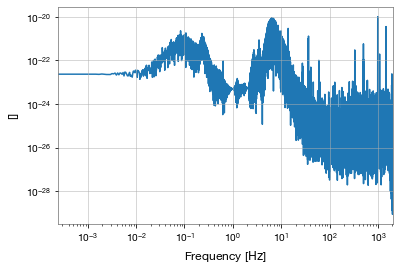

In [12]:
plot = fft_h.abs().plot(xscale="log", yscale="log")
plot.show()

/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


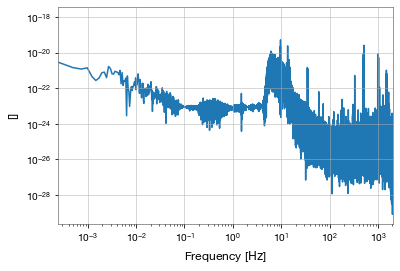

In [13]:
plot = fft_l.abs().plot(xscale="log", yscale="log")
plot.show()

In [14]:
from scipy.signal import get_window
windowh = get_window('hann', hdata.size)
hwin = hdata * windowh
print(hwin)

TimeSeries([-0.00000000e+00, -3.62744735e-33, -1.67263322e-32,
            ..., -6.71608977e-32, -2.69842339e-32,
            -6.86943478e-33]
           unit: dimensionless,
           t0: 1126257414.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [15]:
from scipy.signal import get_window
windowl = get_window('hann', ldata.size)
lwin = ldata * windowl
print(lwin)

TimeSeries([-0.00000000e+00, -4.46405357e-32, -1.82913349e-31,
            ..., -3.82665377e-31, -1.80173543e-31,
            -4.79392839e-32]
           unit: dimensionless,
           t0: 1126257414.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


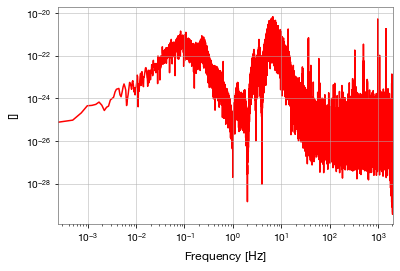

In [16]:
fftamph = hwin.fft().abs()
plot = fftamph.plot(xscale="log", yscale="log", color = 'r')
plot.show()

/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


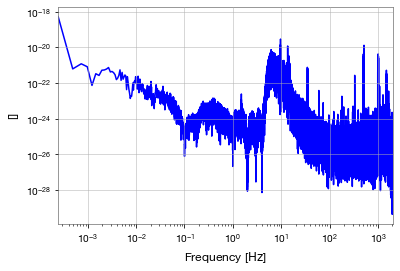

In [17]:
fftampl = lwin.fft().abs()
plot = fftampl.plot(xscale="log", yscale="log", color = 'b')
plot.show()

/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


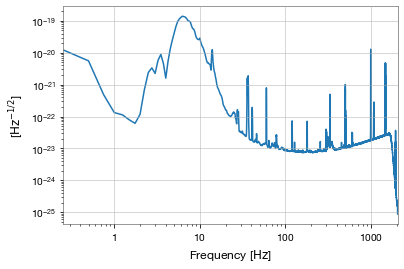

In [18]:
asdh = hdata.asd(fftlength=4, method="median")
plot = asdh.plot()
plot.show()

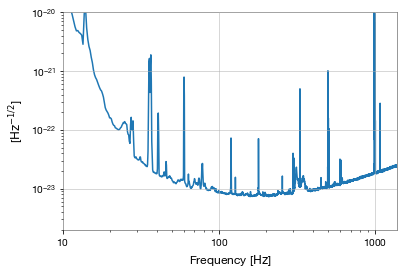

In [19]:
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-24, 1e-20)
plot

/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


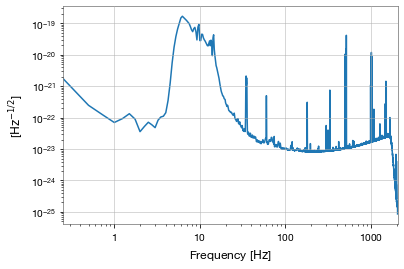

In [20]:
asdl = ldata.asd(fftlength=4, method="median")
plot = asdl.plot()
plot.show()

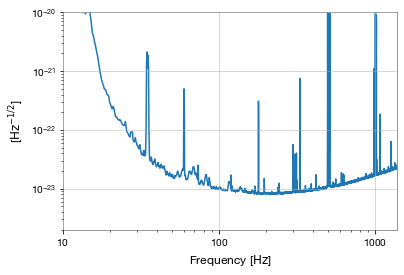

In [21]:
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-24, 1e-20)
plot

/Users/shu-wei/opt/anaconda3/envs/gwda/lib/python3.8/site-packages/gwpy/plot/plot.py:276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


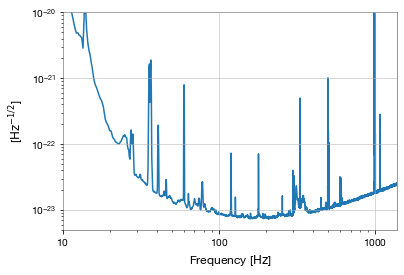

In [22]:
hdata2 = TimeSeries.fetch_open_data('H1', 1126257414, 1126261510, cache=True)
hasd2 = hdata2.asd(fftlength=4, method="median")
plot = hasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(5e-24, 1e-20)
plot.show()

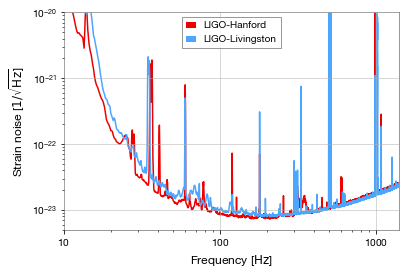

In [23]:
# get Livingston data
ldata = TimeSeries.fetch_open_data('L1', 1126257414, 1126261510 , cache=True)
asdl = ldata.asd(fftlength=4, method="median")

# and plot using standard colours
ax.plot(asdl, label='LIGO-Livingston', color='gwpy:ligo-livingston')

# update the Hanford line to use standard colour, and have a label
hline = ax.lines[0]
hline.set_color('gwpy:ligo-hanford')  # change colour of Hanford data
hline.set_label('LIGO-Hanford')

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot

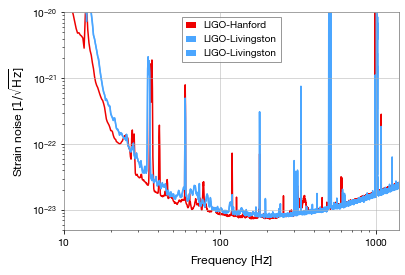

In [24]:
# get Livingston data
ldata2 = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
lasd2 = ldata2.asd(fftlength=4, method="median")

# and plot using standard colours
ax.plot(lasd2, label='LIGO-Livingston', color='gwpy:ligo-livingston')

# update the Hanford line to use standard colour, and have a label
hline = ax.lines[0]
hline.set_color('gwpy:ligo-hanford')  # change colour of Hanford data
hline.set_label('LIGO-Hanford')

ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.legend()
plot